# There are 6 top level task for build a machine learning model

1. Define Problem: Investigate and characterize the problem in order to better understand
the goals of the project.

2. Analyze Data: Use descriptive statistics and visualization to better understand the data
you have available.
3. Prepare Data: Use data transforms in order to better expose the structure of the
prediction problem to modeling algorithms.
4. Evaluate Algorithms: Design a test harness to evaluate a number of standard algorithms
on the data and select the top few to investigate further.
5. Improve Results: Use algorithm tuning and ensemble methods to get the most out of
well-performing algorithms on your data.
6. Present Results: Finalize the model, make predictions and present results.


In [ ]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [76]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [93]:
df.shape

(768, 9)

In [4]:
array = df.values

# Step:3  Data Preprocessing

In [6]:
X = array[: , 0:8]
y = array[:, 8]



##  Rescale Data


In [14]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
reScaledX = scaler.fit_transform(X)

In [41]:
set_printoptions(precision=3)
reScaledX

array([[0.353, 0.744, 0.59 , ..., 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, ..., 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, ..., 0.347, 0.254, 0.183],
       ...,
       [0.294, 0.608, 0.59 , ..., 0.39 , 0.071, 0.15 ],
       [0.059, 0.633, 0.492, ..., 0.449, 0.116, 0.433],
       [0.059, 0.467, 0.574, ..., 0.453, 0.101, 0.033]])

## Standardize Data

In [17]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler().fit(X)
reScaledX = scaler.transform(X)

In [37]:
set_printoptions(precision=3)
reScaledX

array([[ 0.64 ,  0.848,  0.15 , ...,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161, ..., -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, ..., -1.103,  0.604, -0.106],
       ...,
       [ 0.343,  0.003,  0.15 , ..., -0.735, -0.685, -0.276],
       [-0.845,  0.16 , -0.471, ..., -0.24 , -0.371,  1.171],
       [-0.845, -0.873,  0.046, ..., -0.202, -0.474, -0.871]])

## Normalize Data

In [42]:
from sklearn.preprocessing import Normalizer

In [48]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

In [49]:
set_printoptions(precision=3)
normalizedX

array([[0.034, 0.828, 0.403, ..., 0.188, 0.004, 0.28 ],
       [0.008, 0.716, 0.556, ..., 0.224, 0.003, 0.261],
       [0.04 , 0.924, 0.323, ..., 0.118, 0.003, 0.162],
       ...,
       [0.027, 0.651, 0.388, ..., 0.141, 0.001, 0.161],
       [0.007, 0.838, 0.399, ..., 0.2  , 0.002, 0.313],
       [0.008, 0.736, 0.554, ..., 0.241, 0.002, 0.182]])

##  Binarize Data (Make Binary)

In [50]:
from sklearn.preprocessing import Binarizer

In [51]:
scaler = Binarizer().fit(X)
binaryX = scaler.transform(X)

In [54]:
set_printoptions(precision=3)
binaryX[0:5, :]

array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.]])

# Feature Selection

Irrelevant or partially relevant features can negatively impact
model performance. In this chapter you will discover automatic feature selection techniques
that you can use to prepare your machine learning data in Python with scikit-learn

## Univariate Selection

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [59]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [60]:
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)


[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [61]:
# summarize selected features
print(features[0:5,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## Recursive Feature Elimination

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [64]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
print("Num Features:", fit.n_features_) 
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)


Num Features: 3
Selected Features:  [ True False False False False  True  True False]
Feature Ranking:  [1 2 4 5 6 1 1 3]


## Principal Component Analysis

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=3)
fit = pca.fit(X)


In [71]:
# summarize components
print("Explained Variance: ",fit.explained_variance_ratio_)  
print(fit.components_)

Explained Variance:  [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


## Feature Importance 

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

In [73]:
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.11  0.24  0.1   0.078 0.075 0.143 0.114 0.14 ]


In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)
model.feature_importances_

array([0.   , 0.656, 0.   , 0.   , 0.   , 0.193, 0.   , 0.151])

In [80]:
for name, score in zip(df[df.columns], model.feature_importances_):
    print(name, score)

Pregnancies 0.0
Glucose 0.6564199687624899
BloodPressure 0.0
SkinThickness 0.0
Insulin 0.0
BMI 0.19253848413716962
DiabetesPedigreeFunction 0.0
Age 0.15104154710034046


In [81]:
from sklearn.feature_selection import SelectFromModel

In [86]:
clf = SelectFromModel(model, prefit=True)
x = clf.transform(X)
x.shape

(768, 3)

In [87]:
x

array([[148. ,  33.6,  50. ],
       [ 85. ,  26.6,  31. ],
       [183. ,  23.3,  32. ],
       ...,
       [121. ,  26.2,  30. ],
       [126. ,  30.1,  47. ],
       [ 93. ,  30.4,  23. ]])

# Step: 4 Evaluate Machine Learning Algorithms

## Split into Train and Test Sets

In [105]:
from sklearn.model_selection import train_test_split, cross_val_score

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 4)

In [98]:
print(x_train.shape)
print(x_test.shape)

(460, 3)
(308, 3)


In [104]:
model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
print(result * 100)

79.87012987012987


In [118]:
result = cross_val_score(model, x, y, cv=10, scoring='accuracy')
print('Acuraccy: %.3f%%' % (result.mean()*100), '(%.3f%%)' % (result.std()*100))

Acuraccy: 76.570% (3.643%)


## Leave One Out Cross Validation 

In [119]:
from sklearn.model_selection import LeaveOneOut 

In [127]:
loocv = LeaveOneOut()
model = LogisticRegression()
result = cross_val_score(model, x, y, cv=loocv)
print("Accuracy: %.3f%%, (%.3f%%)" %((result.mean()*100), (result.std()*100)))

Accuracy: 76.693%, (42.279%)


## Repeated Random Test-Train Splits

In [122]:
from sklearn.model_selection import ShuffleSplit

In [126]:
kfold = ShuffleSplit(n_splits=10, test_size=0.33, random_state=7)
model = LogisticRegression()
result = cross_val_score(model,x, y, cv=kfold)
print("Accuracy: %.3f%%, (%.3f%%)" %((result.mean()*100), (result.std()*100)))


Accuracy: 76.181%, (2.009%)


## Machine Learning Algorithm Performance Metrics


The metrics that you choose to evaluate your machine learning algorithms are very important.
Choice of metrics influences how the performance of machine learning algorithms is measured
and compared

## Classification Metrics



Classification problems are perhaps the most common type of machine learning problem and as
such there are a myriad of metrics that can be used to evaluate predictions for these problems.

In this section we will review how to use the following metrics:

 Classification Accuracy.

 Logarithmic Loss.

 Area Under ROC Curve.

 Confusion Matrix.

 Classification Report

##  Classification Accuracy 

In [130]:
from sklearn.model_selection import KFold

In [134]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (result.mean(), result.std()))

Accuracy: 0.770 (0.049)


## Logarithmic Loss 

In [136]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
result = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (result.mean(), result.std()))

Accuracy: -0.498 (0.067)


## Confusion Matrix

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=7)
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
matrix = confusion_matrix(y_test, y_predict)
print(matrix)

[[142  20]
 [ 35  57]]


## Classification Report

In [139]:
from sklearn.metrics import classification_report

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=7)
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       162
         1.0       0.74      0.62      0.67        92

    accuracy                           0.78       254
   macro avg       0.77      0.75      0.76       254
weighted avg       0.78      0.78      0.78       254



# 10.3 Regression Metrics
In this section will review 3 of the most common metrics for evaluating predictions on regression

machine learning problems:

 Mean Absolute Error.

 Mean Squared Error.

 R2

## Mean Absolute Error

In [142]:
from sklearn import datasets

In [143]:
boston = datasets.load_boston()

In [145]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [147]:
X = boston.data
y = boston.target

In [150]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [151]:
from sklearn.linear_model import LinearRegression

In [155]:
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
result = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" %(result.mean(), result.std()))

Accuracy: -4.005 (2.084)


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Mean Squared Error

In [157]:
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
result = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" %(result.mean(), result.std()))

Accuracy: -34.705 (45.574)


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## R2 Metric

In [159]:
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
result = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" %(result.mean(), result.std()))

Accuracy: 0.203 (0.595)


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Compare machine learning algorithms

In [167]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [174]:
#load data
df = pd.read_csv('diabetes.csv')
X = df.values[:, 0:8]
y = df.values[:, 8]

In [175]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [187]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)



/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations 

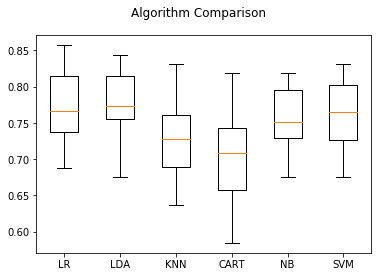

In [178]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Automate Machine Learning

1. How to use pipelines to minimize data leakage.
2. How to construct a data preparation and modeling pipeline.
3. How to construct a feature extraction and modeling pipeline.

## Data Preparation and Modeling Pipeline

In [191]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [202]:
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.773462064251538


## Feature Extraction and Modeling Pipeline 

1. Feature Extraction with Principal Component Analysis (3 features).
2. Feature Extraction with Statistical Selection (6 features).
3. Feature Union.
4. Learn a Logistic Regression Model

In [209]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [210]:
#load data
df = pd.read_csv('diabetes.csv')
X = df.values[:, 0:8]
y = df.values[:, 8]

In [221]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations 

0.7773410799726589


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Step 5: Improve Performance with Ensembles
The three most popular methods for combining the predictions from different models are:

 Bagging. Building multiple models (typically of the same type) from different subsamples
of the training dataset.

 Boosting. Building multiple models (typically of the same type) each of which learns to
fix the prediction errors of a prior model in the sequence of models.

 Voting. Building multiple models (typically of differing types) and simple statistics (like
calculating the mean) are used to combine predictions.

## Bagging Algorithms

Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The final output prediction is averaged

across the predictions of all of the sub-models. The three bagging models covered in this section

are as follows:

 Bagged Decision Trees.

 Random Forest.

 Extra Trees

##  Bagged Decision Trees

In [222]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [226]:

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770745044429255


## Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7655844155844156


## Extra tree

In [232]:
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7656698564593302


## 15.3 Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a final
output prediction. The two most common boosting ensemble machine learning algorithms are:

 AdaBoost.

 Stochastic Gradient Boosting.

## AdaBoost
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works
by weighting instances in the dataset by how easy or difficult they are to classify, allowing
the algorithm to pay or less attention to them in the construction of subsequent models. You
can construct an AdaBoost model for classification using the AdaBoostClassifier class.

 The example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost
algorithm.

In [236]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.760457963089542


## Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles. You can construct a
Gradient Boosting model for classification using the GradientBoostingClassifier class. The example below demonstrates Stochastic Gradient Boosting for classification with 100 trees.

In [238]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7604921394395079


##  Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning
algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classifiers manually or even heuristically is difficult.
More advanced methods can learn how to best weight the predictions from sub-models, but this
is called stacking (stacked aggregation) and is currently not provided in scikit-learn.
You can create a voting ensemble model for classification using the VotingClassifier
class6
. The code below provides an example of combining the predictions of logistic regression,
classification and regression trees and support vector machines together for a classification
problem

In [240]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
kfold = KFold(n_splits=10, random_state=7)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations 

0.7616883116883117


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

